# Import the dataset

In [223]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from scipy.fft import fft, ifft
import numpy as np
from sklearn.neural_network import MLPClassifier
import pickle

## 1. Audio feature extraction

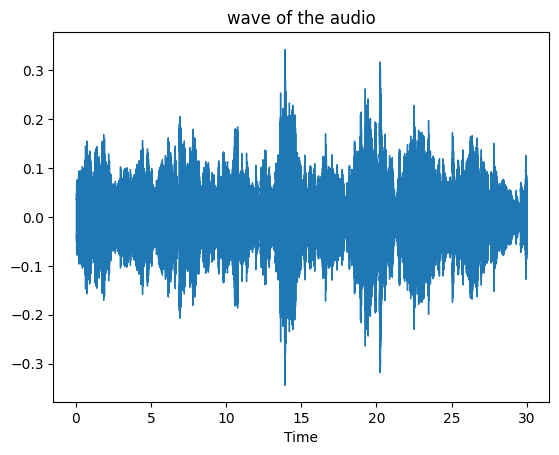

In [2]:
audio,sr=librosa.load('archive\Data\genres_original\classical\classical.00000.wav')
librosa.display.waveshow(audio,sr=sr)
plt.title('wave of the audio')
plt.show()

## 2.Extract key audio features:

<h4>Now here the main important feartures of the audio file is extracted for the further process 
and the audio feature like  Extract features like `MFCCs, chroma features, and spectral contrast` are extracted</h4>

<b>MFCCs:</b> MFCC decomposes the set of audio signals into the coeffecients that represents the frequency compressed form and it helps to classify unique sounds of musical items so that the ML model can recognize the difference.


<b>chroma features:</b> It is a feature which tells how much energy is involved in each pitch and helps to classify genre of the music.
helps to identify harmonic structures.

<b>spectral contrast:</b> this helps to recognize the most prominent features with peaks and valleys of the waves and recognizes the vocals, background music and noise etc.

In [146]:
mfcc= librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=13) # 13 MFCCs is a common default setting because it's been shown through experiments (particularly in speech processing) that the first 12 to 13 MFCCs are enough to capture most of the relevant information from the audio for classification or recognition tasks.
chroma=librosa.feature.chroma_stft(y=audio,sr=sr)
spectral_contrast=librosa.feature.spectral_contrast(y=audio, sr=sr)

## 3.Store features in a dataset

In [239]:
%%time
def extract_features(audio_path):
    audio,sr=librosa.load(audio_path)
    mfccs= librosa.feature.mfcc(y=audio,sr=sr,n_mfcc=13)
    return mfccs.mean(axis=1)

def extract_features_for_multiple_files(file_paths, labels):
    features_list=[]
    for i, file_path in enumerate(file_paths):
        features=extract_features(file_path)
        features=list(features) + [labels[i]]
        features_list.append(features)
    mfcc_columns = [f'mfcc_{i}' for i in range(13)]
    mfcc_columns.append('label')
    df = pd.DataFrame(features_list, columns=mfcc_columns)
    return df

root_folder = "archive\\Data\\genres_original"
genres = ['classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Generate file paths for each genre and each file number from 1 to 10
file_paths = [f"{root_folder}\\{genre}\\{genre}.{'{:05d}'.format(i)}.wav" for genre in genres for i in range(1, 11)]

labels = [genre for genre in genres for _ in range(10)]
df = extract_features_for_multiple_files(file_paths, labels)

CPU times: total: 1.91 s
Wall time: 2.76 s


In [240]:
df

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,label
0,-324.091248,133.562668,-25.030157,24.553610,-11.939921,17.658503,-5.518673,1.716890,-10.575926,-0.860575,-7.805220,3.529763,5.054665,classical
1,-235.302658,141.119522,-34.681889,30.979191,-16.402012,23.118080,-11.041572,7.654360,-19.016834,4.226782,-11.835752,8.917746,-1.445148,classical
2,-326.897430,127.400604,-30.596176,37.471397,-5.296175,20.813564,-1.778685,-4.615457,-4.040198,5.242275,-0.642449,2.794567,7.229207,classical
3,-259.952576,118.927132,-35.608337,31.969566,-16.524868,10.618957,-15.653265,7.425692,-5.824160,8.266380,-17.991137,-1.187928,-6.356529,classical
4,-264.335571,138.179703,-30.096487,37.836620,-7.173124,6.774079,-11.809729,4.705630,-9.825993,5.859127,-9.563163,2.676857,-4.788712,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-98.386482,136.574875,-46.714024,46.476673,-17.152012,10.547506,-14.580566,16.551331,-12.312679,3.701862,-12.647758,2.951305,-12.505246,rock
86,-140.464172,149.300491,-10.073525,38.784744,1.535095,20.120266,-11.341880,16.292198,-13.255261,10.183559,-9.257683,4.699766,-8.370978,rock
87,-14.946681,138.440567,-41.902412,22.075436,-18.676533,32.004406,-20.370274,15.703648,-17.348824,14.874468,-8.903126,12.260918,-5.828866,rock
88,-178.603470,154.005020,-4.958518,21.928644,-2.054027,23.674204,-1.284849,11.562133,-6.027086,4.947251,-2.940482,5.409077,-4.123982,rock


### 3.1 Scaling

In [242]:
scaler=StandardScaler()
features=['mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11','mfcc_12']
df[features]=scaler.fit_transform(df[features])
df

,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,label
0,-1.859045,0.901038,-0.832127,-0.840669,-0.972974,0.174396,-0.066361,-1.270564,-0.697068,-1.469653,-0.424241,-0.340920,1.702811,classical
1,-0.974344,1.114869,-1.382615,-0.332320,-1.350171,0.705321,-0.720333,-0.512263,-1.910874,-0.662396,-1.210261,0.648674,0.458176,classical
2,-1.887006,0.726675,-1.149586,0.181300,-0.411354,0.481214,0.376495,-2.079295,0.242773,-0.501259,0.972616,-0.475951,2.119209,classical
3,-1.219959,0.486907,-1.435456,-0.253968,-1.360557,-0.510176,-1.266409,-0.541468,-0.013762,-0.021396,-2.410662,-1.207404,-0.482293,classical
4,-1.263631,1.031683,-1.121086,0.210194,-0.570020,-0.884077,-0.811292,-0.888859,-0.589227,-0.403377,-0.767069,-0.497571,-0.182075,classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.389907,0.986272,-2.068871,0.893737,-1.413571,-0.517124,-1.139390,0.624008,-0.946814,-0.745690,-1.368615,-0.447164,-1.659696,rock
86,-0.029360,1.346360,0.020927,0.285203,0.166118,0.413794,-0.755893,0.590913,-1.082358,0.282820,-0.707495,-0.126029,-0.868035,rock
87,1.221313,1.039065,-1.794439,-1.036726,-1.542445,1.569485,-1.824955,0.515746,-1.671014,1.027169,-0.638351,1.262705,-0.381251,rock
88,-0.409385,1.479480,0.312662,-1.048339,-0.137284,0.759402,0.434971,-0.013185,-0.042943,-0.548073,0.524462,0.004248,-0.054787,rock


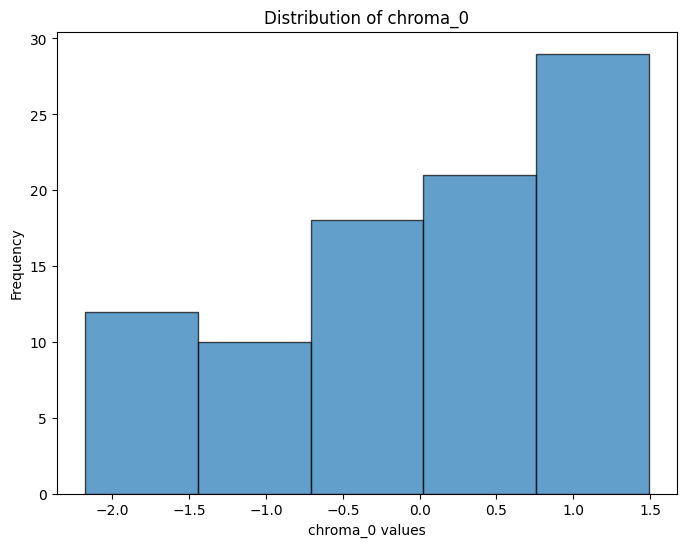

In [243]:
plt.figure(figsize=(8, 6))
plt.hist(df['mfcc_0'], bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribution of chroma_0')
plt.xlabel('chroma_0 values')
plt.ylabel('Frequency')
plt.show()

## 4.Train/Test - split

In [232]:
# Normalize features
X = df.drop(columns=['label'])
y = df['label'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [233]:
X_train.shape[0], X_test.shape[0]

(72, 18)

## 5.Model Training

In [234]:
model = SVC(gamma='scale')
model.fit(X_train, y_train)

SVC()

In [235]:
y_pred = model.predict(X_test)
y_pred

array(['jazz', 'country', 'metal', 'reggae', 'classical', 'disco',
       'hiphop', 'pop', 'country', 'jazz', 'reggae', 'hiphop', 'metal',
       'reggae', 'country', 'classical', 'country', 'country'],
      dtype=object)

In [236]:
y_test

40         jazz
22        disco
55        metal
70       reggae
0     classical
26        disco
39       hiphop
65          pop
10      country
44         jazz
81         rock
35       hiphop
56        metal
86         rock
12      country
4     classical
18      country
28        disco
Name: label, dtype: object

In [237]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 77.78%


In [144]:
with open('music-predictor.pkl','wb') as file:
    pickle.dump(model,file) # importing model

In [145]:
with open('music-predictor-scaler.pkl','wb') as file:
    pickle.dump(scaler,file) #  importing scaler